# ECOM90025 ADA: Tutorial 11 in Week 12

- Covering materials from week 11 lecture: non-parametrics trees.

# My contact:
- Name: Zheng Fan
- Email: fan.z@unimelb.edu.au
- Send me an email if you have any general or conceptual questions
- I'm also happy to stay for a while after the tutorial.
- Consultataion: send an email to Yong to book consultations
- Special consideration: visit Stop 1.

# Tutorial participation 
- You need to actively participate instead of just showing up. 
- Attendance does not guarantee marks. 
- You may get a maximum of 10 points out of 11 tutorials.
- If you unable to come to school, seek help from Stop 1.

# Software:
- Google Colab is a free online platform where you can execute your code (especially for Python) and write text (LaTeX and Html) without any software installed.
- Local Jupyter Lab, which has been demonstrated during the lecture.
- Local Jupyter Notebook from Anaconda (My personal preference). Just download Anaconda, and then open Jupyter Notebook.
- Other IDE such as PyCharm, but I'm not very comfortable with using PyCharm. From what I know, the code saved in PyCharm is .py but not .ipynb, which may requires some conversion.

Although you can always use Colab, It is recommended to have a local machine installed.

#### You may access my tutorial code via: https://github.com/zhengf1/2023-S2-ADA or Canvas after Wednesday afternoon.
- <font color="red">
If you are using Google Colab, you can simply copy paste the code; or you can upload this ".ipynb" notebook file to Google Colab, which would look exactly the same as local Jupyter machine.
    </font>

# Housekeeping code to start with

- You can ignore the next sentence if you are using Google Colab
- If you are using local Jupyter machine, you may find **graphviz** does not work well. As alternative, I will show another way of printing tree diagram.

In [1]:
!pip install graphviz
!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

# Decision Trees (Titanic dataset)

<img src="https://www.dropbox.com/s/5p2icoxdikqluui/RMS_Titanic_3.jpeg?dl=1" width=200>

[Kaggle Exercise](https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset/notebook).

More [discussion](https://www.kaggle.com/c/titanic/discussion/10169)

In [3]:
df_train = pd.read_csv("https://www.dropbox.com/s/i0kduxato6oxwyg/train.csv?dl=1")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
N,K = df_train.shape
print(N,K)

891 12


In [5]:
df_train.tail()
# obviously PassengerId is from1 to N, no use in analysis.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# check is there any NA entries
df_train.isnull().sum()
# "Age", "Cabin" and 'embarked' has many missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age has 177 out of 891 missing values
The online note simulated some ages from its unconditional distribution.
- Cabin and Embarked are objects. NaN cab be treated as a category.

In [7]:
# we do have prior knowledge that sex is key to survive
# make a balance check
df_train['Sex'].value_counts()
# more males than females

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df_train.loc[df_train['Age'].isna(), 'Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [9]:
df_train.loc[df_train['Cabin'].isna(), 'Sex'].value_counts()
# looks fine

male      470
female    217
Name: Sex, dtype: int64

## Logistic Regression

Women (sex) and Children (age) first:
- The dependent variable is "Survived or not". 
- Use *Age* and *Sex* to ***run a Logistic regression***.
- Keep in mind that *Age* has missing values

In [10]:
y, X = patsy.dmatrices('Survived ~ Sex + Age -1', data=df_train, return_type='dataframe')

In [11]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X, y)

/Users/zhengfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [12]:
y_pred = logit.predict(X)

In [13]:
ct = pd.crosstab(y['Survived'], y_pred, rownames=['Actual'], colnames=['Predicted'])

print(ct)

Predicted  0.0  1.0
Actual             
0.0        360   64
1.0         93  197


# CART: Classification and Regression Tree (algorithm 23)

Being with the root containing the full sample
1. Find location $x_{ij}$ that minimizes the loss (9.1)
1. Split accordingly
1. Repeat these steps for each child.

The procedure is repeated until a leaf node reaches a minimum size.

## Women (sex) and Children (age) first

- The dependent variable is "Survived or not". 
- Use *Age* and *Sex* to ***grow a tree***.
- Keep in mind that *Age* has missing values

In [14]:
y, X = patsy.dmatrices('Survived ~ Sex + Age -1', data=df_train, return_type='dataframe')

In [15]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [16]:
# somehow: the following does not work in a local jupyter notebook
# dot_data = export_graphviz(clf, out_file=None,
#                          feature_names=X.columns,
#                          class_names=True, filled=True,
#                          rounded=True, special_characters=True)
# Generate the graph from dot data
# graph = graphviz.Source(dot_data)
# graph

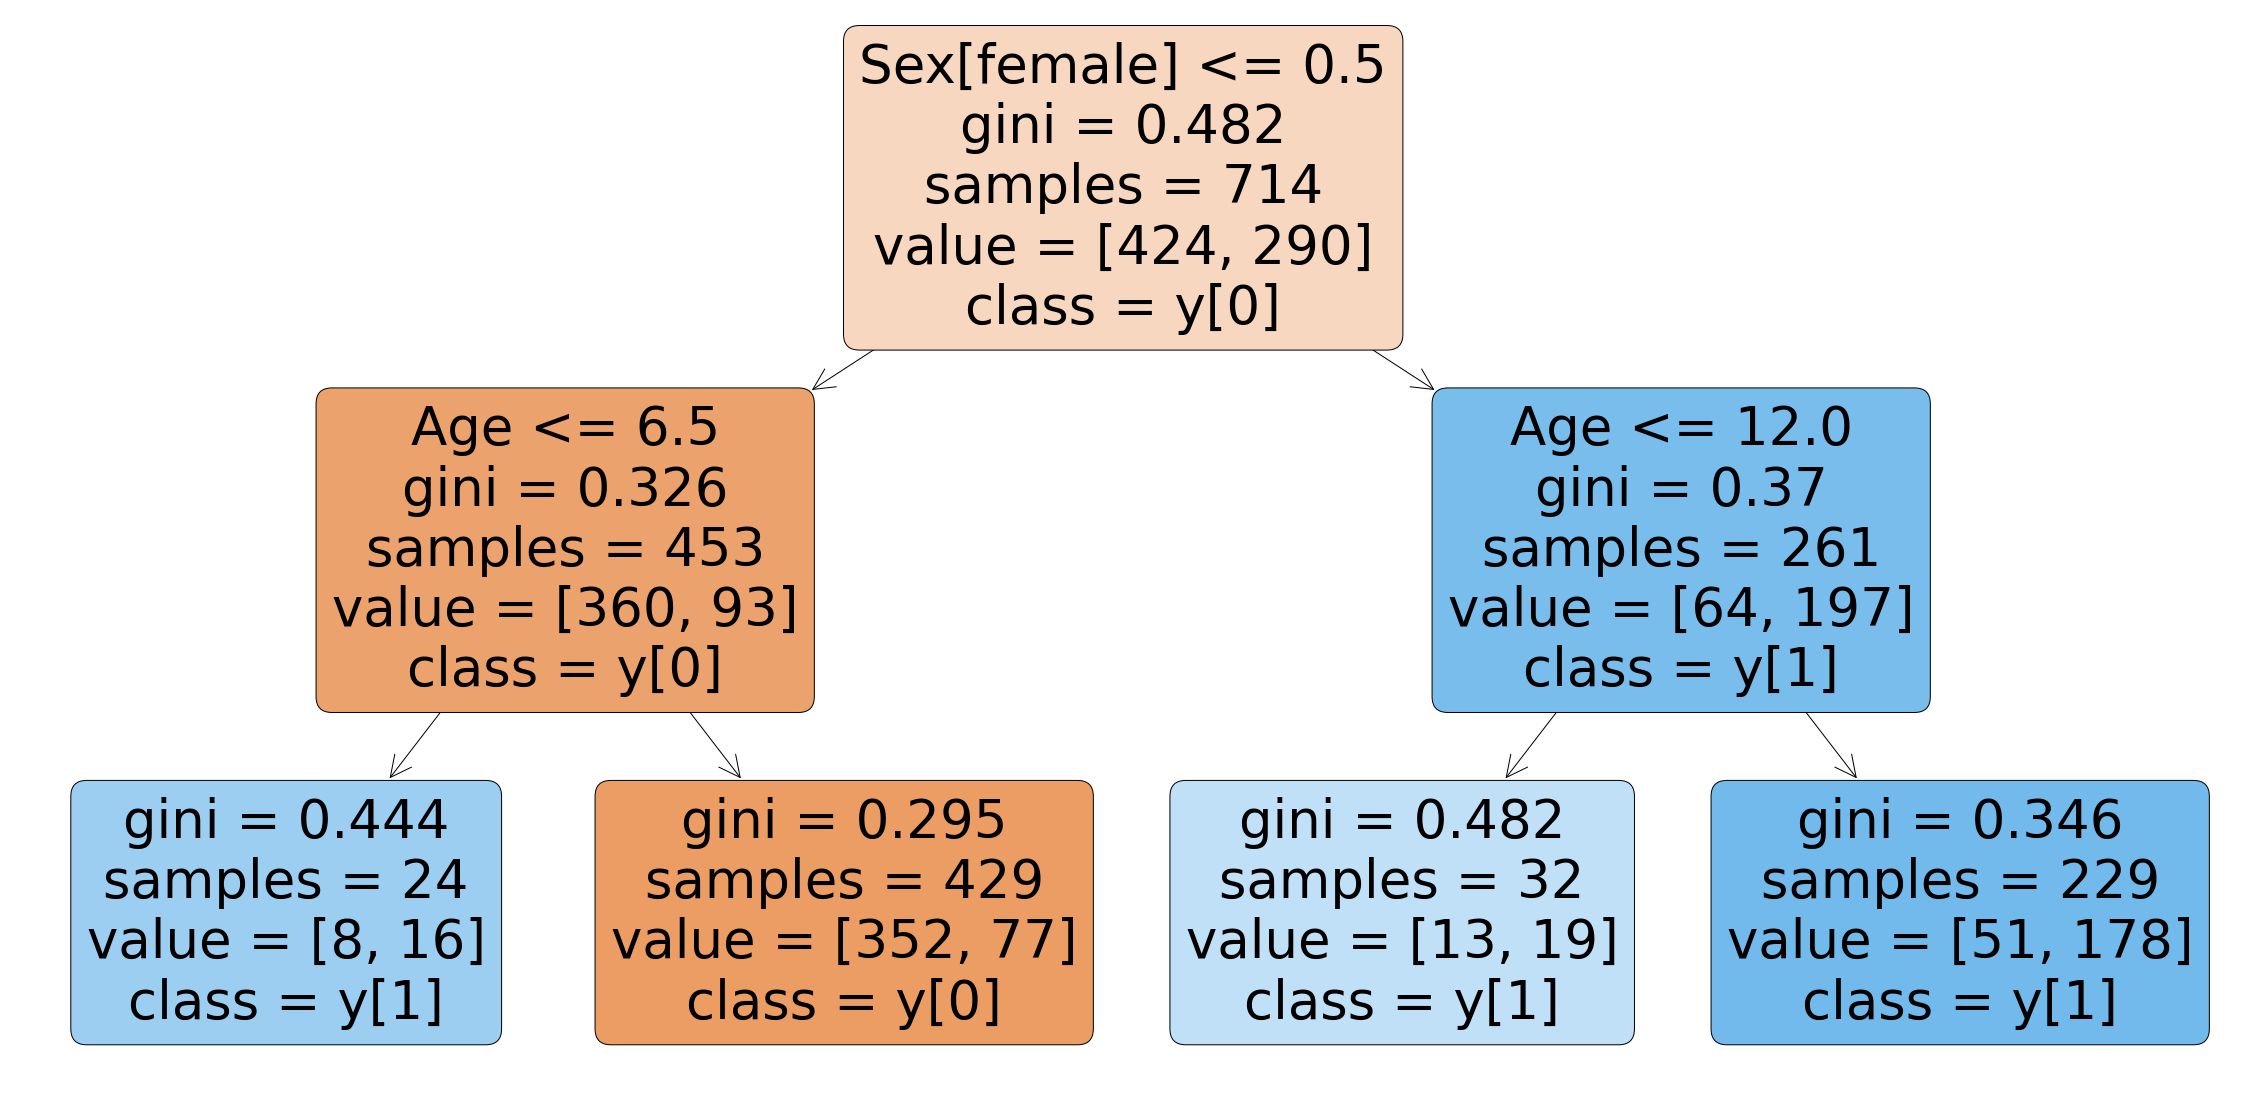

In [18]:
# I used alternative
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf, feature_names = X.columns, filled=True, rounded = True, class_names=True)
plt.show()

- A lower Gini impurity indicates a more homogenous set of instances in the node.
- A node with Gini impurity close to 0 is desirable as it suggests that the instances in that node are predominantly from a single class.

In [19]:
# Now prune the tree based on Cost-Complexity to merge some unnecessary branches
clf = DecisionTreeClassifier()
clf.fit(X, y)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

scores = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha)
    score = np.mean(cross_val_score(tree, X, y, cv=5))  # Using 5-fold CV
    scores.append(score)

In [20]:
best_alpha = ccp_alphas[np.argmax(scores)]
best_alpha

0.004970878707559037

In [21]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha)
pruned_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.004970878707559037)

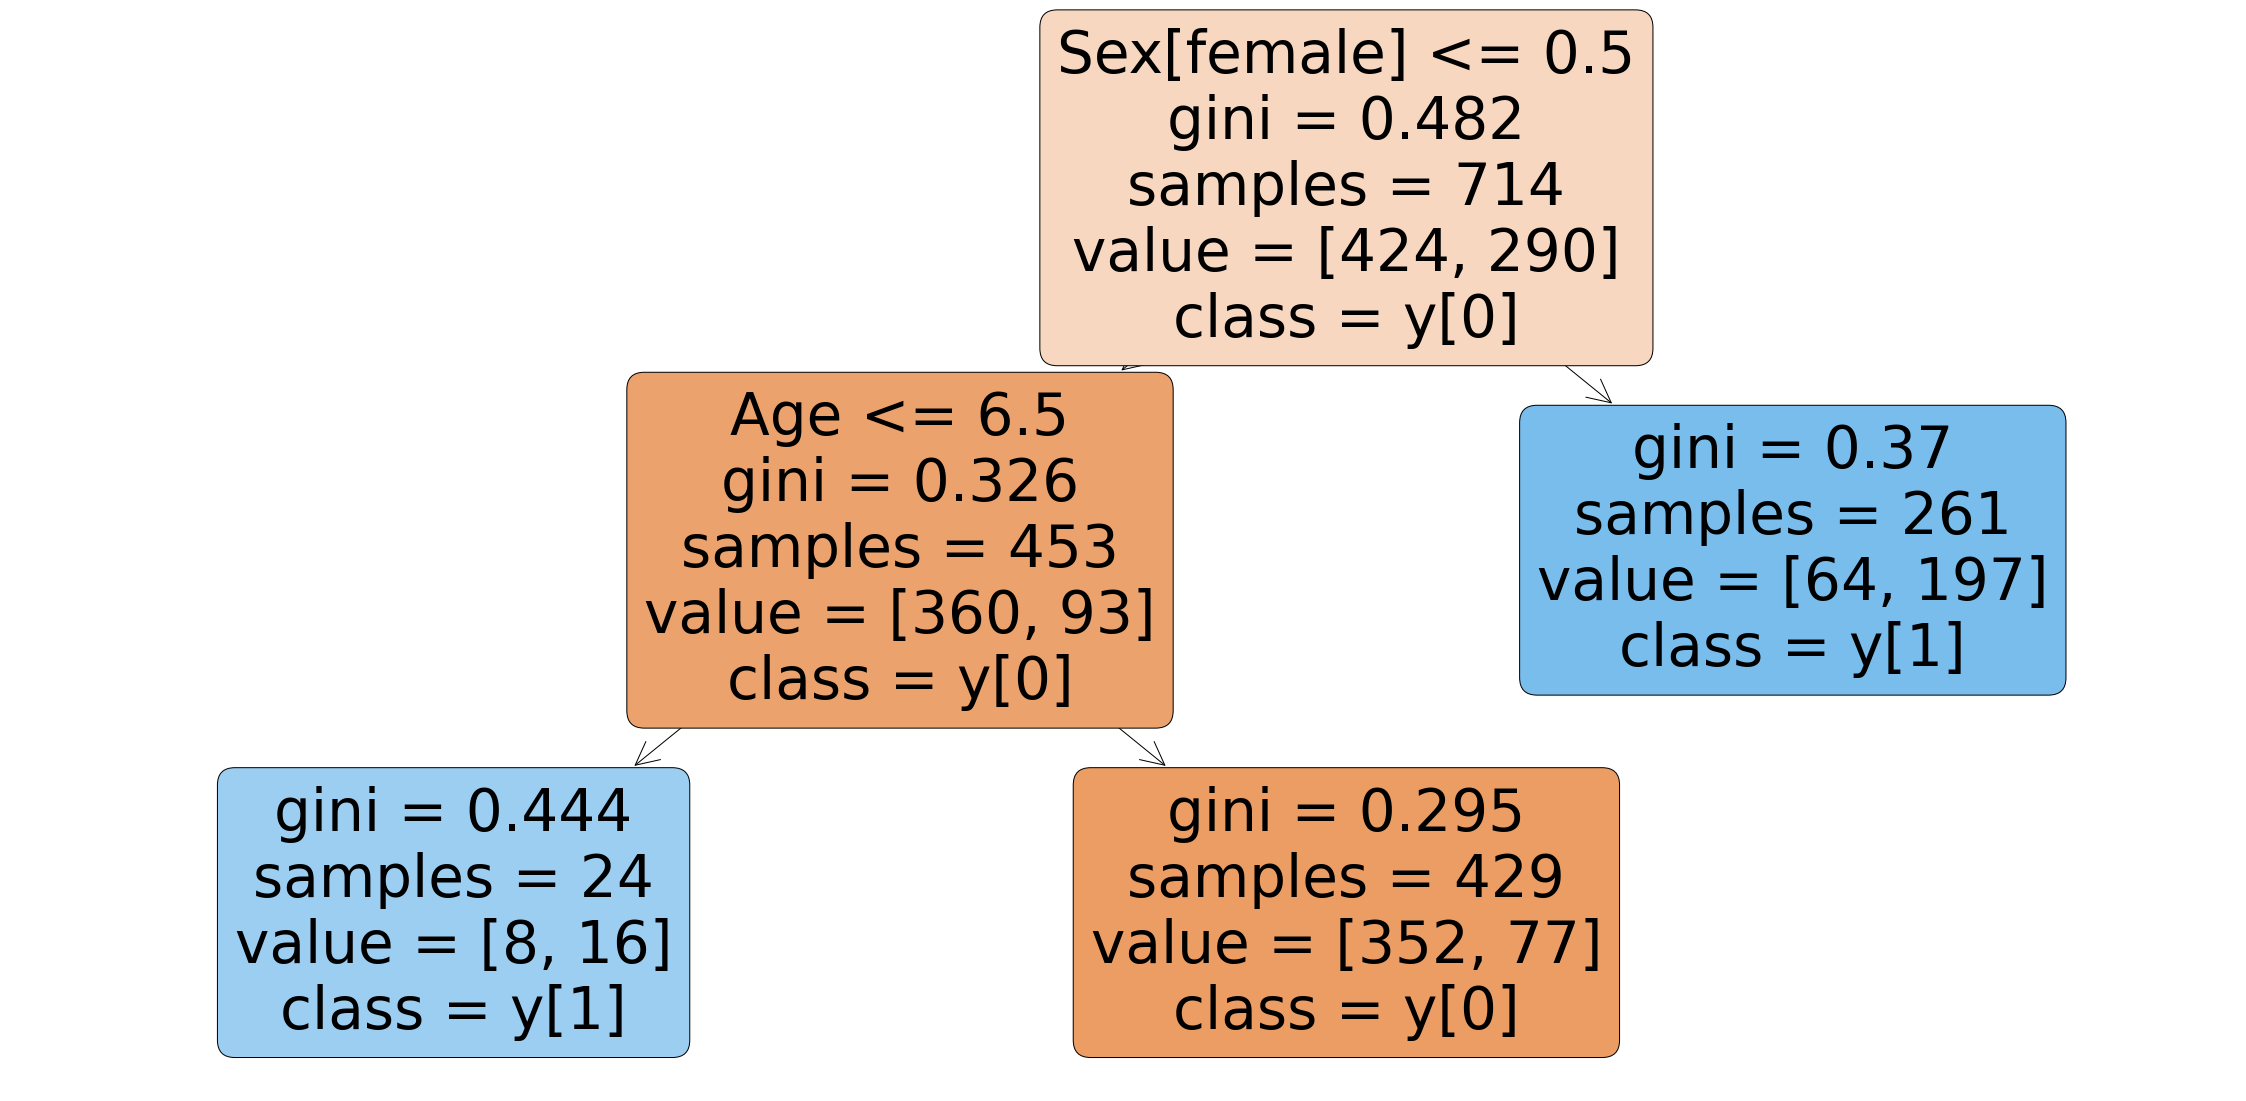

In [22]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
__ = tree.plot_tree(pruned_tree, feature_names = X.columns, filled=True, rounded = True, class_names=True)
plt.show()

In [23]:
y_pred = pruned_tree.predict(X)

In [24]:
ct = pd.crosstab(y['Survived'], y_pred, rownames=['Actual'], colnames=['Predicted'])

print(ct)

Predicted  0.0  1.0
Actual             
0.0        352   72
1.0         77  213


# Random Forest (RF)

- A tree can be unstable. A subtle difference in the node could lead to a significant deviation in the prediction for different trees.
- **bagging**： bootstrap aggregating. It takes care of uncertainty to stabilise the model and hence prediction. It can be interpreted as the Bayesian model averaging (**BMA**)

- **RF** may damage performce when $n$ is large.

**Algorithm 24**
$B$ is the bootstrap size
1. sample with replacement $n$ observations from the data.
1. Fit a CART tree $\mathcal{T}_b$ to the sample

For $b=1,...,B$, there are $B$ trees $\mathcal{T}_1,...,\mathcal{T}_B$. The prediction is simply the sample average of predictions from all trees.

In [36]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

<ipython-input-36-d1d813aa4257>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X, y)


RandomForestClassifier()

In [37]:
y_pred = rf_clf.predict(X)
ct = pd.crosstab(y['Survived'], y_pred, rownames=['Actual'], colnames=['Predicted'])

print(ct)

Predicted  0.0  1.0
Actual             
0.0        375   49
1.0         79  211


## Test Data

In [27]:
df_test = pd.read_csv("https://www.dropbox.com/scl/fi/b9etzcpfxyoe52o0mmtn5/test.csv?rlkey=qrdc62mqi9wwtiqkj7zp40qm5&dl=1")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
y_fake, X_test = patsy.dmatrices('Age ~ Sex + Age -1', data=df_test, return_type='dataframe')

In [29]:
df_submission = pd.read_csv("https://www.dropbox.com/scl/fi/va0u9huh339kmy33qavbx/gender_submission.csv?rlkey=daj1ln7frarcruiwc0lymva34&dl=1")
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [30]:
y_pred = logit.predict(X_test)
df_submission.loc[X_test.index, 'Survived'] = y_pred

In [31]:
df_submission.to_csv("submission_logit.csv", index=False)

In [32]:
y_pred = pruned_tree.predict(X_test)
df_submission.loc[X_test.index, 'Survived'] = y_pred
df_submission.to_csv("submission_tree.csv", index=False)

In [33]:
y_pred = rf_clf.predict(X_test)
df_submission.loc[X_test.index, 'Survived'] = y_pred
df_submission.to_csv("submission_rf.csv", index=False)

# Results

For the simple analysis with Age and Sex, the Logit model wins. However,
- we did not use other information
- we did not tune the random forest
- we did not interpolate `Age`

Try yourself at home: how could we improve the prediction?

<img src="https://www.dropbox.com/scl/fi/gn9erocmke2hvlu3nrnk6/titanic_kaggle_score.png?rlkey=ew37iljo4ssdzyny9j5i3mu2r&dl=1">

# Thanks for you attention!
- ## Thank you all for your support throughout this semester!
- ## See you in the future and best wishes!

# Very well done with your presentations!
- ## You all did amazing works!

# Good luck with your empirical project!
- ## Don't miss the deadline: this Friday Oct 20th 23:59 pm.
- ## Check your language and grammar.
- ## Format it nicely as a proper paper.

# Good luck with your final exam!
- ## bring your own stationary
- ## bring your student card for ID check
- ## check your seat number
- ## no other materials are permitted (blank paper and calculator are not needed)

# Be well prepared
- ## be familiar with all the techniques we learned from the lecture, tutorial and assessments.
- ## revise together as a group

# Thank you all again!